<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Артефакты" data-toc-modified-id="Артефакты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Артефакты</a></span></li><li><span><a href="#Добавление-столбцов" data-toc-modified-id="Добавление-столбцов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Структура-объектов-питания-в-Москве" data-toc-modified-id="Структура-объектов-питания-в-Москве-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Структура объектов питания в Москве</a></span></li><li><span><a href="#Посадочные-места" data-toc-modified-id="Посадочные-места-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посадочные места</a></span></li><li><span><a href="#Расположение" data-toc-modified-id="Расположение-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расположение</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Представление-результатов" data-toc-modified-id="Представление-результатов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Представление результатов</a></span></li></ul></div>

# Рынок заведений общественного питания Москвы

Необходимо определить, насколько жизнеспособна в долгосрочной перспективе бизнес-идея открытия небольшого кафе в Москве, в котором посетителей будут обслужить роботы. Для этого надо изучить открытые данные о заведениях общественного питания в городе и на их основе подготовить исследование рынка.

Описание таблицы `rest_data`:
* `id` — идентификатор объекта
* `object_name` — название объекта общественного питания
* `chain` — сетевой ресторан
* `object_type` — тип объекта общественного питания
* `address` — адрес
* `number` — количество посадочных мест

**Цель исследования** - на основе имеющихся данных дать рекомендации относительно наиболее выигрышных вида, размера и места положения открываемого заведения.

**План исследования:**
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Выводы
5. Представление результатов

## Обзор данных

Для начала импортируем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests

%matplotlib inline

Откроем данные о заведениях общественного питания Москвы с помощью методов библиотеки `pandas`:

In [2]:
rest_data = pd.read_csv('//censored//')

rest_data.info()
rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Так, пропусков в датафрейме нет, все типы данных определены верно, названия столбцов приведены к "змеиному регистру". Однако необходимо проверить таблицу на наличие явных и неявных дубликатов, а столбец `number` - на наличие артефактов.

## Предобработка данных

### Дубликаты

Сначала проверим датафрейм на наличие полных дубликатов:

In [3]:
rest_data.duplicated().sum()

0

Полных дубликатов в таблице нет. Теперь проверим столбцы с типом данных `object` на наличие дубликатов:

In [4]:
for column in rest_data.columns:
    if rest_data[column].dtype == 'object':
        display('Количество дубликатов в столбце {} равно {}'.format(column, rest_data[column].duplicated().sum()))

'Количество дубликатов в столбце object_name равно 4973'

'Количество дубликатов в столбце chain равно 15364'

'Количество дубликатов в столбце object_type равно 15357'

'Количество дубликатов в столбце address равно 6258'

Так, в столбце с названиями обнаружено 4973 дубликата, однако одно и то же заведение может быть расположено в нескольких местах одновременно, если оно входит в сеть. В связи с этим необходимо проверить, сколько из таких дубликатов являются сетевыми заведениями.

В столбце `chain` дубликатов на два меньше, чем строк в таблице. Поскольку данный столбец должен содержать только два значения ("да" или "нет"), такое количество дубликатов говорит о том, что в столбце нет неявных дубликатов и артефактов. Дубликатов в столбце `object_type` тоже очень много, поскольку типы объектов общественного питания представляют собой ограниченный набор вариантов. Однако данный столбец надо будет проверить на неявные дубликаты.

В столбце с адресами заведений нашлось 6258 дубликатов, однако по одному адресу может располагаться несколько разных заведений. Необходимо проверить, есть ли в таблице заведения с одним наименованием и расположенные по одинаковому адресу (это дубликаты).

In [5]:
# проверим, есть ли повторяющиеся названия из столбца object_name, которые не входят в сети:
display(rest_data[np.logical_and(rest_data['object_name'].duplicated(), rest_data['chain'] == 'нет')]['id'].count())

# посчитаем количество заведений с одинаковыми названиями и адресами:
display(rest_data[['object_name', 'address']].duplicated().sum())

# посмотрим на эти заведения:
pd.set_option('display.max_rows', 208)
rest_data[rest_data[['object_name', 'address']].duplicated()]

2714

207

,id,object_name,chain,object_type,address,number
114,28613,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
579,149227,Общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
1648,151871,Ресторан «Практика By Darvin»,нет,кафе,"город Москва, Большая Грузинская улица, дом 37...",50
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150
2376,28605,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,кафетерий,"город Москва, 2-я Бауманская улица, дом 5, стр...",35
2377,28606,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, стр...",16


Так, нашлось 2714 повторяющихся названий объектов питания, которые не являются частью сетей. Однако здесь стоит учитывать, что некоторые типичные названия могут использоваться отдельными независимыми завелениями (например, "Кафе", "Столовая" и т.п.), поэтому это необходимо изучить подробнее.

Что касается, одих и тех же заведений по одному и тому же адресу, как видно, это часто объекты или с общими названиями (типа Кафе, Общественное питание и т.п.) или же объекты с очень специфичными названиями (например, Столовая «Комбинат питания КОСМОС» или Каменев Василий Владимирович). Причём некоторые из этих заведений встречаются в таблице гораздо больше двух раз. Да и представить возможность размещения одного заведения по одному и тому же адресу, даже в торговом центре, сложно (легче разместить одно большое заведение). Это точно дубликаты, их необходимо удалить:

In [6]:
rest_data = rest_data.drop(rest_data[rest_data[['object_name', 'address']].duplicated()].index)
rest_data.shape[0]

15159

Итак, дублирующиеся заведения удалены. Теперь посмотрим список уникальных названий повторяющихся объектов питания, которые не входят в сеть:

In [7]:
rest_data[np.logical_and(
    rest_data['object_name'].duplicated(), rest_data['chain'] == 'нет')]['object_name'].sort_values().unique()

array(['24 Градуса', 'BB&Burgers', 'Baskin Robbins', 'Burger Heroes',
       'Cafetera', 'Chicken Duck', 'ChopEat', 'Cinnabon', 'Coffee Moose',
       'Coffee Play', 'Craft Beer', 'Dim Sum&Co', 'Domino-s Pizza',
       'Dominos Pizza', 'Eat Market', 'FARШ', 'FOOD PLACE', 'FRIDAYS',
       'Fan Zone', 'Fruit Lab', 'GAGAWA', "Harat's Pub", 'Harats Pub',
       'Hookah Place', 'IL Патио', 'JD Burgers', 'Kitchen',
       'Krispy Kreme', 'LIFT', 'Lambic', 'Lao Lee', 'Meatless',
       'My Gelato', 'One Price Coffee', 'One bucks coffee',
       'OnePriceCoffe', 'PLOV.COM', 'PRIME', 'Pho', 'Pho Hanoi',
       'Pho Viet', 'PhoBo', 'Pinzeria by Bontempi', 'Pizza Hut',
       'Pizza express', 'Plov.com', 'Ploveberry', 'Point 242',
       'Ribambelle', 'Salateria', 'Shake Up', 'Silver Panda',
       'Soul Seoul', 'Star Hit Cafe', 'Sufifood', 'Sushi Love',
       'Sushi-Make', 'Take Wake', 'Thali&Dosa', 'Tutti Frutti',
       'UPSIDE DOWN CAKE', 'Upside Down Cake', 'Wild Bean Cafe',
       'Wine a

Из полученных результатов сразу видны неявные дубликаты (например, "Азбука Вкуса" и "Азбука вкуса", "Harat's Pub" и "Harats Pub", "Даблби" и "Кафе «Даблби»" и т.д.). Для того, чтобы избавиться от неявных дубликатов для начала приведём все названия к нижнему регистру (конечно, некоторые названия включают в себя заглавные буквы, но здесь точностью передачи названия придётся пожертвовать, чтобы удалить дубликаты). Кроме того, удалим из названий заведений слова "кафе", "столовая" и другие слова, которые можно добавлять, а можно не добавлять к названию (только если это не единственное слово в названии). Случаи типа "Harat's Pub" придётся исправлять вручную.

In [8]:
rest_data['object_name'] = rest_data['object_name'].replace("Harats Pub", "Harat's Pub")
rest_data['object_name'] = rest_data['object_name'].replace('Кафе Столовая', 'Кафе-столовая')
rest_data['object_name'] = rest_data['object_name'].replace('Столовая № 1', 'Столовая №1')
rest_data['object_name'] = rest_data['object_name'].replace('Domino-s Pizza', 'Dominos Pizza')

Сначала проверим на неявные дубликаты столбец `object_type`:

In [9]:
types = list(rest_data['object_type'].sort_values().unique())

types

['бар',
 'буфет',
 'закусочная',
 'кафе',
 'кафетерий',
 'магазин (отдел кулинарии)',
 'предприятие быстрого обслуживания',
 'ресторан',
 'столовая']

Дубликатов в этом столбце нет. Теперь напишем функцию для преобразований наименований заведений:

In [10]:
# посчитаем, сколько было уникальных названий заведений до преобразований:
display(rest_data['object_name'].nunique())

# напишем функцию:
def no_duplicates(name):
    name = name.lower()
    # удалим из строки слова, входящие в types, и добавим к ним "кофейню":
    if ' ' in name and (
        name.split(' ', 1)[0] in types or name.split(' ', 1)[0] == 'кофейня') and not 'толовая №1' in name and not '1404' in name and not '(' in name and not 'афе № 1' in name and not 'афетерий № 1' in name:
        name = name.replace(name.split(' ', 1)[0], '', 1)[1:]
    # удалим кавычки:
    if '«' and '»' in name:
        name = name.replace('«', '')
        name = name.replace('»', '')
    return name

rest_data['object_name'] = rest_data['object_name'].apply(no_duplicates)

# пересчитаем количество уникальных названий:
rest_data['object_name'].nunique()

10389

9339

Так, после преобразований количество уникальных наименований объектов питания сократилось более чем на тысячу, т.е. были удалены некоторые неявные дубликаты.

Посмотрим на список уникальных названий повторяющихся объектов питания, которые являются частью сети, ещё раз:

In [11]:
np.set_printoptions(threshold=15400)

rest_data[np.logical_and(
    rest_data['object_name'].duplicated(), rest_data['chain'] == 'нет')]['object_name'].sort_values().unique()

array(['13 rules', '24 градуса', '5 комбинат питания при мгу',
       '7 сендвичей', 'abc coffee roasters', 'arcus bar and food',
       'baskin robbins', 'bb grill', 'bb&burgers', 'black star burger',
       'black star burgers', 'bo', 'bocconcino', 'bokker', 'boobo', 'bp',
       'buba by sumosan', 'buffalos', 'burger heroes', 'cafetera',
       'camera obscura', 'cezve coffee', 'chicken duck', 'chopeat',
       'ciao pizza', 'cinnabon', 'coffe to go', 'coffee like',
       'coffee moose', 'coffee play', 'cofix', 'correas', 'craft beer',
       'dim sum', 'dim sum & co', 'dim sum&co', 'dobrosco',
       'dominos pizza', 'doner kebab', 'dreamwok', 'duck it', 'duckit',
       'dunkin donuts', 'eat market', 'eshak', 'fan zone', 'farш',
       'food place', 'fresh bar', 'fresh cafe', 'fridays', 'fruit lab',
       'gagawa', 'gvido gelato', "harat's pub", 'healthy food',
       'hookah burger', 'hookah place', 'i like bar', 'il fornetto',
       'il patio', 'il pizzaiolo', 'il патио', 'jd

Как сразу видно из данного списка, многие рестораны, попавшие в него на самом деле являются частью сетей (например, Burger Heroes, Stake It Easy, Азбука Вкуса и др. Исправим эту ошибку позже.

А пока посмотрим на уникальные адреса:

In [12]:
rest_data['address'].sort_values().unique()

array(['1-й Нагатинский проезд, дом 10',
       '1-я Тверская-Ямская улица, дом 29/66, корпус 1',
       '2-я Брестская улица, дом 1, строение 1',
       '2-я Брестская улица, дом 5, строение 1',
       '5-й Котельнический переулок, дом 11',
       'Алтуфьевское шоссе, дом 52А',
       'Бауманская улица, дом 7, строение 3',
       'Большая Бронная улица, дом 20/1/27, строение 2',
       'Большая Серпуховская улица, дом 48, строение 2',
       'Варшавское шоссе, владение 99А',
       'Вознесенский переулок, дом 7, строение 1',
       'Вспольный переулок, дом 19/20, строение 1',
       'Дербеневская улица, дом 11А, строение 17',
       'Калашный переулок, дом 8А/5, строение 3', 'Киевская улица, дом 7',
       'Коровинское шоссе, дом 46, корпус 1',
       'Краснобогатырская улица, дом 90, строение 1',
       'Ленинградский проспект, дом 37, корпус 4',
       'Ленинградский проспект, дом 39, строение 2',
       'Ленинский проспект, владение 164', 'Медынская улица, дом 11А',
       'Митинск

Адреса в целом написаны единообразно, нигде нет сокращений, но на всякий случай уберём заглавные буквы, запятые и точки:

In [13]:
# посчитаем, сколько было уникальных адресов до преобразований:
display(rest_data['address'].nunique())

rest_data['address'] = rest_data['address'].map(lambda x: x.lower().replace(',', '').replace('.', '').replace('город москва ', ''))

# пересчитаем:
rest_data['address'].nunique()

9108

9105

В данном случае количество уникальных значений уменьшилось всего на 3, но всё же от некоторых неявных дубликатов мы избавились.

Повторно проверим повторяющиеся заведения заведения:

In [14]:
rest_data[['object_name', 'address']].duplicated().sum()

47

Так, количество дубликатов увеличилось на 47. Удалим их из таблицы:

In [15]:
rest_data = rest_data.drop(rest_data[rest_data[['object_name', 'address']].duplicated()].index)
rest_data.shape[0]

15112

Отлично, от явных и неявных дубликатов избавились. Теперь проверим столбец с количеством посадочных мест на артефакты, а затем исправим ошибки в столбце `chain`.

### Артефакты

С помощью метода `describe` посмотрим информацию о значениях в столбце `number`:

In [16]:
rest_data['number'].describe()

count    15112.000000
mean        59.926019
std         74.972420
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Так, значения варьируются от 0 до 1700. Стоит отметить, что совсем не быть посадочных мест может далеко не во всех объектах питания. Посмотрим, в каких типах заведений встречается ноль посадочных мест:

In [17]:
rest_data[rest_data['number'] == 0].groupby(
    'object_type').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False)

,object_type,id
6,предприятие быстрого обслуживания,689
3,кафе,298
2,закусочная,181
5,магазин (отдел кулинарии),144
4,кафетерий,109
1,буфет,63
7,ресторан,42
0,бар,27
8,столовая,19


Так, наибольшее количество нулей встречается среди предприятий быстрого обслуживания. В таких заведениях действительно может не быть посадочных мест. То же касается магазинов и закусочных. Остальные типы объектов общественного питания представить совсем без посадочных мест сложно. Посмотрим, что это за заведения:

In [18]:
appropriate_types = ['предприятие быстрого обслуживания', 'закусочная', 'магазин (отдел кулинарии)']

pd.set_option('display.max_rows', None)
rest_data[np.logical_and(rest_data['number'] == 0, np.logical_not(
    rest_data['object_type'].isin(appropriate_types)))]

,id,object_name,chain,object_type,address,number
206,150836,гбоу школа №1468,нет,столовая,волгоградский проспект дом 17 строение 1,0
504,157035,кофе с собой,да,кафетерий,краснохолмская набережная дом 13 строение 1,0
577,149220,кофе хаус,да,кафе,павелецкая площадь дом 1а строение 1,0
802,142581,кофе энигма,нет,кафе,овчинниковская набережная дом 22/24 строение 1,0
1003,149427,французская пекарня,нет,кафетерий,русаковская улица дом 29,0
1018,21413,интермедсервис,нет,буфет,садовая-каретная улица дом 20 строение 2,0
1054,138535,кофе с собой,да,буфет,большая серпуховская улица дом 31 корпус 10,0
1148,155495,суши wok,да,кафе,таганская улица дом 31/22,0
1229,155493,шаурма24,нет,кафетерий,флотская улица дом 36,0
1509,143449,добрынинский,нет,буфет,братиславская улица дом 14,0


Среди заведений встречаются такие как "кофе на вынос" и "кофе с собой", а также cofix, по сути представляющие собой кофе на вынос, и МИЛТИ, работающее на доставку. Кроме того, в пекарнях также может не быть посадочных мест. Все эти заведения относятся к категорям "кафе", "кафетерий" или "буфет". Что касается ресторанов, баров и столовых, тут представить заведения без собственных мест сложно: даже в торговых центрах такие заведения имеют собственные посадочные места, поэтому удалим такие заведения:

In [19]:
appropriate_types.extend(['кафе', 'кафетерий', 'буфет'])

rest_data = rest_data.drop(rest_data[np.logical_and(rest_data['number'] == 0, np.logical_not(
    rest_data['object_type'].isin(appropriate_types))                
)].index)

# пересчитаем:
rest_data[rest_data['number'] == 0].groupby(
    'object_type').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False)

,object_type,id
5,предприятие быстрого обслуживания,689
2,кафе,298
1,закусочная,181
4,магазин (отдел кулинарии),144
3,кафетерий,109
0,буфет,63


Отлично, теперь проверим заведения с подозрительно небольшим числом посадочных мест (1-10):

In [20]:
rest_data.loc[(rest_data['number'] >= 1) & (rest_data['number'] <= 10)].pivot_table(
    index='object_type', columns='number', values='id', aggfunc='count'
).reset_index()

number,object_type,1,2,3,4,5,6,7,8,9,10
0,бар,3.0,7.0,6.0,11.0,11.0,9.0,2.0,8.0,4.0,37.0
1,буфет,3.0,2.0,2.0,9.0,3.0,7.0,1.0,7.0,2.0,19.0
2,закусочная,3.0,19.0,3.0,15.0,9.0,10.0,NaN,10.0,1.0,26.0
3,кафе,17.0,56.0,29.0,74.0,88.0,87.0,25.0,109.0,17.0,366.0
4,кафетерий,5.0,13.0,14.0,32.0,15.0,30.0,6.0,25.0,3.0,39.0
5,магазин (отдел кулинарии),8.0,13.0,6.0,17.0,3.0,12.0,NaN,5.0,1.0,15.0
6,предприятие быстрого обслуживания,56.0,70.0,22.0,67.0,36.0,55.0,15.0,33.0,8.0,93.0
7,ресторан,NaN,1.0,NaN,3.0,1.0,3.0,1.0,3.0,NaN,19.0
8,столовая,4.0,1.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,11.0


Так, если в существование многих видов объектов питания с таким небольшим количеством мест ещё можно поверить, то рестораны и столовые, в которых нет по крайней мере 9 мест вызывают сомнение. Удалим их из таблицы.

In [21]:
rest_data = rest_data.drop(
    rest_data.loc[(rest_data['number'] < 9) & (
        np.logical_or(rest_data['object_type'] == 'ресторан', rest_data['object_type'] == 'столовая'))].index).reset_index(drop=True)

# проверим:
rest_data.loc[(rest_data['number'] < 9) & (
        np.logical_or(rest_data['object_type'] == 'ресторан', rest_data['object_type'] == 'столовая'))]['id'].count()

0

Отлично, все подозрительные записи удалены. Теперь вернёмся к определению сетей. На примере Азбуки Вкуса можно увидеть, что у некоторых заведений сети в столбце `chain` стоит "нет":

In [22]:
rest_data[rest_data['object_name'] == 'азбука вкуса']

,id,object_name,chain,object_type,address,number
593,156524,азбука вкуса,нет,кафе,ленинский проспект дом 82/2,10
595,156525,азбука вкуса,нет,кафе,ленинский проспект дом 91,10
679,156605,азбука вкуса,да,кафе,проспект мира дом 49,20
1022,157402,азбука вкуса,нет,кафе,садовая-черногрязская улица дом 13/3 строение 1,10
1060,156893,азбука вкуса,да,кафе,смоленская-сенная площадь дом 27 строение 1а,8
1226,157965,азбука вкуса,нет,кафе,2-я фрунзенская улица дом 10,4
1316,157911,азбука вкуса,нет,кафе,улица покровка дом 15/16 строение 1,10
1582,157309,азбука вкуса,да,кафе,ленинградский проспект дом 69 строение 1,10
2065,158192,азбука вкуса,нет,кафе,новокузнецкая улица дом 1 строение 3,10
3363,19613,азбука вкуса,да,бар,мичуринский проспект дом 22 корпус 1,6


Тогда напишем в графе `chain` у заведения "да", если оно встречается в таблице более одного раза.

In [23]:
def chain_yes(row):
    # ищем повторяющиеся имена, исключая типичные
    if rest_data[rest_data['object_name'] == row['object_name']]['object_name'].duplicated().sum() != 0 and not row['object_name'].split(' ', 1)[0] in types and row['object_name'] != 'кофейня' and row['object_name'] != 'шаурма' and row['object_name'] != 'пекарня' and row['object_name'] != 'хинкальная' and row['object_name'] != 'школьно-базовая столовая' and row['object_name'] != 'шаурма, выпечка' and row['object_name'] != 'пиццерия' and row['object_name'] != 'кульнария'  and row['object_name'] != 'кофе' and row['object_name'] != 'кофе с собой' and row['object_name'] != 'кальянная':
        return 'да'
    else:
        return 'нет'
    
rest_data['chain'] = rest_data.apply(chain_yes, axis=1)

# посмотрим на Топ сетевых заведений после преобразования:
rest_data[rest_data['chain'] == 'да'].pivot_table(
    index='object_name', values='id', aggfunc='count').reset_index().sort_values(by='id', ascending=False).head(15)

,object_name,id
1138,шоколадница,181
72,kfc,166
636,макдоналдс,155
230,бургер кинг,143
978,теремок,107
438,домино'с пицца,92
590,крошка картошка,88
937,суши wok,74
664,милти,71
725,папа джонс,53


In [24]:
# ещё раз посмотрим на заведения азбуки вкуса:
rest_data[rest_data['object_name'] == 'азбука вкуса']

,id,object_name,chain,object_type,address,number
593,156524,азбука вкуса,да,кафе,ленинский проспект дом 82/2,10
595,156525,азбука вкуса,да,кафе,ленинский проспект дом 91,10
679,156605,азбука вкуса,да,кафе,проспект мира дом 49,20
1022,157402,азбука вкуса,да,кафе,садовая-черногрязская улица дом 13/3 строение 1,10
1060,156893,азбука вкуса,да,кафе,смоленская-сенная площадь дом 27 строение 1а,8
1226,157965,азбука вкуса,да,кафе,2-я фрунзенская улица дом 10,4
1316,157911,азбука вкуса,да,кафе,улица покровка дом 15/16 строение 1,10
1582,157309,азбука вкуса,да,кафе,ленинградский проспект дом 69 строение 1,10
2065,158192,азбука вкуса,да,кафе,новокузнецкая улица дом 1 строение 3,10
3363,19613,азбука вкуса,да,бар,мичуринский проспект дом 22 корпус 1,6


Так, ошибки в таблице исправлены: все заведения, входящие в сеть, теперь помечены соответствующим образом.

In [25]:
display('Сохранено {}% первоначальной таблицы'.format(round(rest_data.shape[0]/15336*100, 2)))

'Сохранено 97.8% первоначальной таблицы'

После удаления дубликатов и артефактов было сохранено примерно 98% изначальных данных, т.е. допустимые значения не были превышены.

### Добавление столбцов

Для удобства определения места положения заведений выделим столбец с названием улиц:

In [26]:
def street(row):
    return row['address'].split(' дом', 1)[0].split(' владение', 1)[0].split(' корпус', 1)[0]

rest_data['street'] = rest_data.apply(street, axis=1)
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,да,кафе,улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,академия,да,кафе,абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,да,кафе,абрамцевская улица дом 1,40,абрамцевская улица
4,119365,вишневая метель,нет,кафе,абрамцевская улица дом 9 корпус 1,50,абрамцевская улица


Теперь, [пользуясь открытыми источниками](https://data.mos.ru/opendata/1788), найдём данные о районах Москвы и адресах, которые в них находятся. Загрузим другую таблицу с данными об объектах общественного питания Москвы, в которой есть информация о районах.

In [27]:
spreadsheet_id = '1FM9JQVuTlMR6j41FcaoSRRKKvp6pKV6yrwQthkUHfbU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district_data = pd.read_csv(BytesIO(r.content))

display('Количество наблюдений в таблице: {}'.format(district_data.shape[0]))
district_data.head()

'Количество наблюдений в таблице: 2299'

,global_id,ID,Name,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,637377206,58565,Тануки,да,Тануки,ресторан,Северный административный округ,район Коптево,"город Москва, Большая Академическая улица, дом 65",PublicPhone:(499) 153-81-44\n\n,160,нет,37.547610,55.840266,0101000000357BA01518C642406AF816D68DEB4B40,NaN
1,637377794,24387,Готика,да,Готика,ресторан,Северный административный округ,Дмитровский район,"город Москва, Ангарская улица, дом 39",PublicPhone:(495) 483-11-50\n\n,65,да,37.524522,55.879112,0101000000E751D88523C342409363FFC086F04B40,NaN
2,637378082,127979,Месопотамия,нет,NaN,ресторан,Центральный административный округ,район Арбат,"город Москва, улица Арбат, дом 4, строение 1",PublicPhone:(495) 913-32-12\n\n,42,нет,37.598455,55.752016,01010000000EE57D309ACC42400798AD0E42E04B40,NaN
3,637378210,88194,TAJJ MAHAL,да,TAJJ MAHAL,ресторан,Центральный административный округ,район Арбат,"город Москва, улица Арбат, дом 6/2",PublicPhone:(495) 107-91-06\n\n,100,нет,37.597570,55.752024,0101000000FC1FCA287DCC4240BE9FFB5042E04B40,NaN
4,637378607,24967,IL Pizzaiolo,нет,NaN,ресторан,Центральный административный округ,район Арбат,"город Москва, улица Арбат, дом 31",PublicPhone:(495) 933-28-34\n\n,70,нет,37.592799,55.749654,010100000026E481D4E0CB4240BBAB34A8F4DF4B40,NaN


В данной таблице также присутствуют уникальные идентификаторы заведений, а значит можно объединить две таблицы по столбцу `id`. Однако количество наблюдений в новом датафрейме в 7 раз меньше, чем в исследуемом. А значит, для абсолютного большинства будет нельзя добавить информацию о районе, если объединять таблицы по `id`. Тем не менее несколько заведений могут располагаться на одной улице, поэтому, если объединять таблицы по улице, можно добавить информацию о районе к большему числу объектов питания.

In [28]:
# преобразуем столбец Address в новом датафрейме:
district_data['Address'] = district_data['Address'].map(lambda x: x.lower().replace(',', '').replace('.', '').replace('город москва ', ''))

# приведём названия районов к нижнему регистру:
district_data = district_data.rename(columns={'District':'district', 'Address':'address'})
district_data['district'] = district_data['district'].map(lambda x: x.lower())

# добавим столбец street:
district_data['street'] = district_data.apply(street, axis=1)

# сгруппируем, поскольку каждой улице может соответствовать несколько районов:
district_data_grouped = district_data.groupby('street').agg({'district':'first'}).reset_index()

district_data_grouped.shape[0], district_data_grouped['street'].nunique()

(762, 762)

Так, мы получили 762 уникальных наименований улиц в Москве, каждой из которых соответствует один район.

In [29]:
# объединяем таблицы:
rest_data = rest_data.merge(district_data_grouped[['street', 'district']], on='street', how='left')

rest_data.info()
rest_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14999 non-null  int64 
 1   object_name  14999 non-null  object
 2   chain        14999 non-null  object
 3   object_type  14999 non-null  object
 4   address      14999 non-null  object
 5   number       14999 non-null  int64 
 6   street       14999 non-null  object
 7   district     10807 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.0+ MB


,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,улица егора абакумова дом 9,48,улица егора абакумова,NaN
1,77874,родник,да,кафе,улица талалихина дом 2/1 корпус 1,35,улица талалихина,NaN
2,24309,академия,да,кафе,абельмановская улица дом 6,95,абельмановская улица,NaN
3,21894,пиццетория,да,кафе,абрамцевская улица дом 1,40,абрамцевская улица,NaN
4,119365,вишневая метель,нет,кафе,абрамцевская улица дом 9 корпус 1,50,абрамцевская улица,NaN
5,27429,стол. при гоу сош № 1051,нет,столовая,абрамцевская улица дом 15 корпус 1,240,абрамцевская улица,NaN
6,148815,брусника,да,кафе,переулок сивцев вражек дом 6/2,10,переулок сивцев вражек,NaN
7,20957,мтуси,нет,столовая,авиамоторная улица дом 8 строение 1,90,авиамоторная улица,район лефортово
8,20958,кпф семья-1,нет,столовая,авиамоторная улица дом 8 строение 1,150,авиамоторная улица,район лефортово
9,148595,пекарня 24,да,закусочная,авиамоторная улица дом 47,5,авиамоторная улица,район лефортово


Количество строк в таблице `rest_data` не изменилось, а у 72% заведений теперь отмечен район. Отлично! Можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

### Структура объектов питания в Москве

Чтобы проанализировать рынок объектов питания в Москве, для начала посмотрим их распределение по видам:

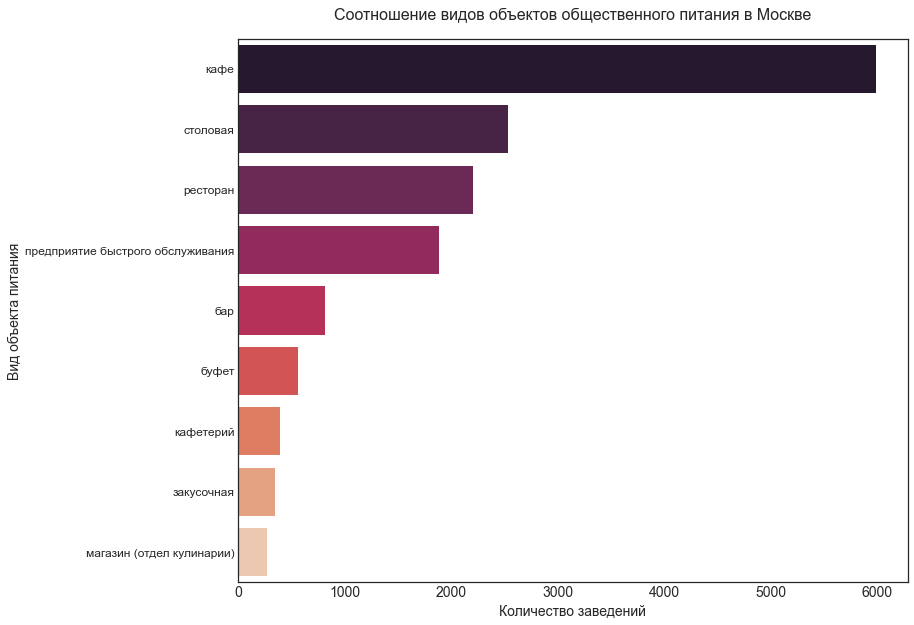

In [30]:
plt.style.use('seaborn-white')

# напишем функцию для определения цветов в палитре:
def define_palette(x):
    return sns.color_palette('rocket', x)

fig, ax = plt.subplots()
sns.barplot(x='id', y='object_type', data=rest_data.pivot_table(
    index='object_type', values='id', aggfunc='count').reset_index().sort_values(by='id', ascending=False), palette=define_palette(9), orient='h')
plt.xlabel('Количество заведений', fontsize=14)
plt.ylabel('Вид объекта питания', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
ax.set_title('Соотношение видов объектов общественного питания в Москве', fontsize=16, pad=20)
fig.set_figheight(10)
fig.set_figwidth(12)
plt.show()

По графику видно, что более трети всех объектов питания в Москве (около 6000) позиционируют себя как кафе, далее вследуют столовые (более 2500 объектов), рестораны (около 2200) и предприятия быстрого обслуживания (чуть менее 2000). Все остальные виды заведений насчитывают около 2400 точек. Наименее распространены отделы кулинарии в магазинах (примерно 250 точек).

Посмотрим соотношение сетевых и несетевых заведений:

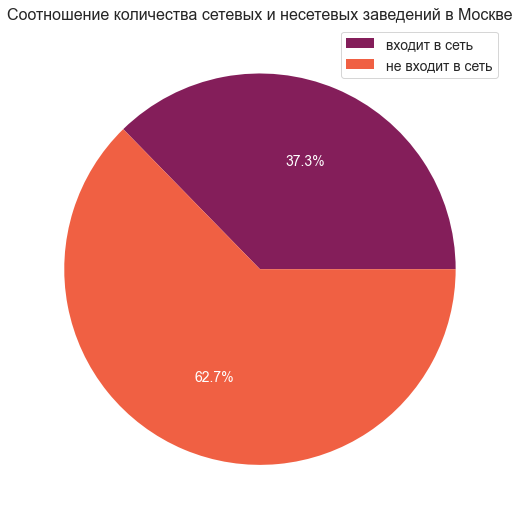

In [31]:
fig, ax = plt.subplots()
plt.pie(data=rest_data.pivot_table(index='chain', values='id', aggfunc='count').reset_index(), x='id', labels=['входит в сеть', 'не входит в сеть'], colors=define_palette(2), autopct='%1.1f%%', textprops={'fontsize': 14, 'color':'w'})
plt.legend(fontsize=14, frameon=True)
ax.set_title('Соотношение количества сетевых и несетевых заведений в Москве', fontsize=16)
fig.set_figheight(9)
fig.set_figwidth(9)
plt.show()

Так, в Москве превалируют заведения, не являющиеся частью сети, однако количество сетевых и несетевых заведений можно назвать сопоставимым (62.7% против 37.3%). Посмотрим, для какого вида объекта питания характерно сетевое распространение:

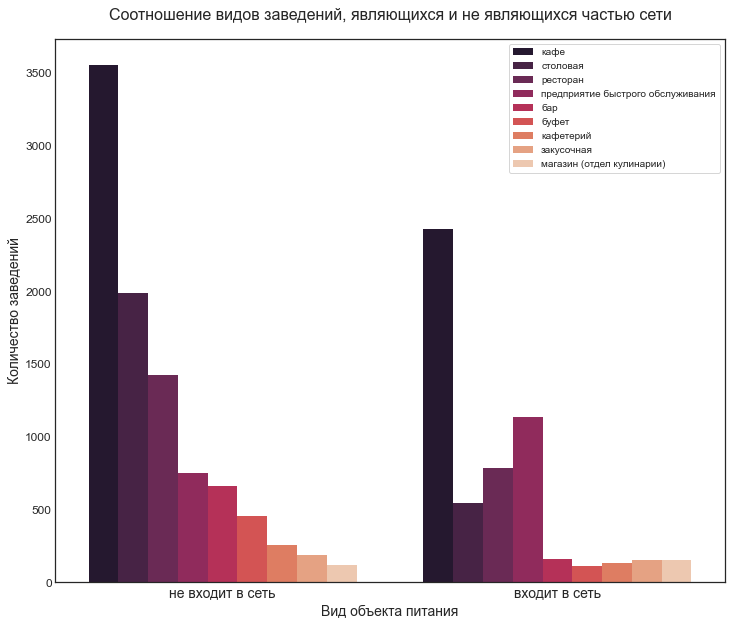

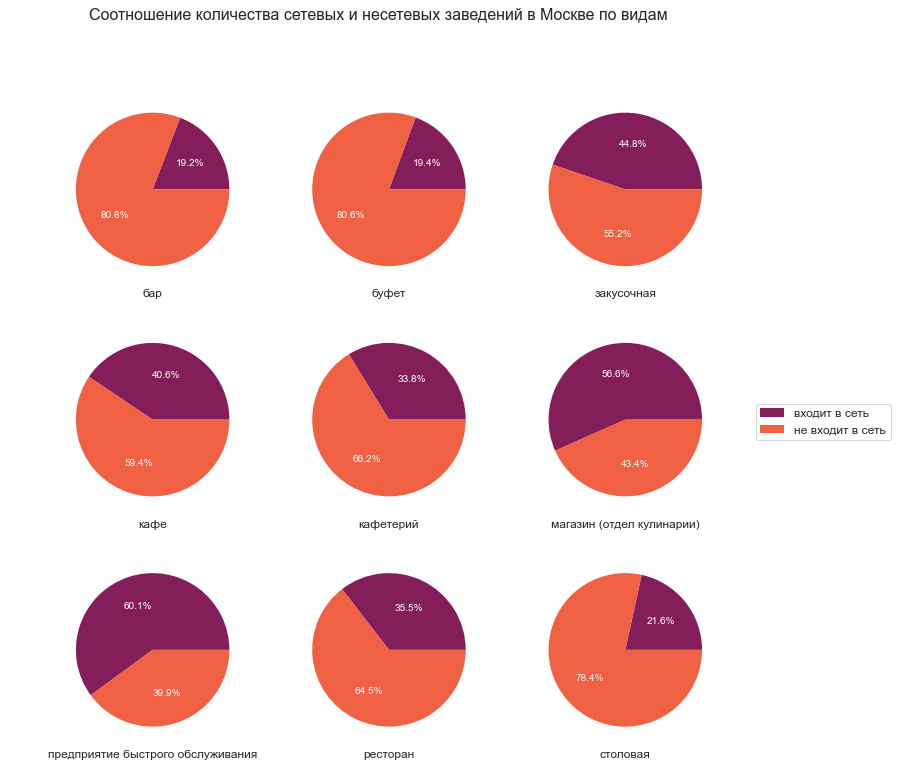

In [32]:
# построим столбатую диаграмму с абсолютными величинами:
fig, ax = plt.subplots()
sns.barplot(x='chain', y='id', hue='object_type', data=rest_data.pivot_table(
    index=['object_type', 'chain'], values='id', aggfunc='count').reset_index().sort_values(by='id', ascending=False), palette=define_palette(9), orient='v')
plt.xlabel('Вид объекта питания', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.xticks([0, 1], ['не входит в сеть', 'входит в сеть'], fontsize=14)
plt.yticks(fontsize=12)
ax.set_title('Соотношение видов заведений, являющихся и не являющихся частью сети', fontsize=16, pad=20)
plt.legend(fontsize=10, frameon=True)
fig.set_figheight(10)
fig.set_figwidth(12)
plt.show()

# и несколько круговых диаграмм с относительными:
fig, axes = plt.subplots(3, 3)
fig.suptitle('Соотношение количества сетевых и несетевых заведений в Москве по видам', fontsize=16)
for index, value in enumerate(types):
    ax = plt.subplot(3, 3, index+1)
    plt.pie(data=rest_data.query('object_type == @value').pivot_table(index='chain', values='id', aggfunc='count').reset_index(), x='id', labels=['входит в сеть', 'не входит в сеть'], colors=define_palette(2), autopct='%1.1f%%', textprops={'fontsize': 10, 'color':'w'})
    ax.set_xlabel(value, fontsize=12)
fig.legend(['входит в сеть', 'не входит в сеть'], loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=12, frameon=True)
fig.set_figheight(12)
fig.set_figwidth(12)
plt.show()

Так, как видно из столбчатой диаграммы, в абсолютном выражении сетевое распространение характерно для кафе (около 2500 из них являются частью сетей), предприятий быстрого питания (примерно 1300), ресторанов (около 800) и столовых (около 600). Однако, если посмотреть на распределение видов объектов питания среди несетевых заведений, можно заметить, что кафе, столовые и рестораны доминируют и в данном случае, потому что их просто численно больше. Поэтому посмотрим на круговые диаграммы для каждого вида заведений: по ним видно, что сетевое распространение наиболее характерно для предприятий быстрого питания (60.1% из них являются частью сети), отделов кулинарии магазинов (56.6%) и закусочных (44.8%). При этом только 40.6% кафе, 35.5% ресторанов и 21.6% столовых в Москве входят в сети. Эти выводы подтверждаются и эмпирическим опытом.

### Посадочные места

Теперь посмотрим, как различаются по количеству посадочных мест сетевые и несетевые заведения:

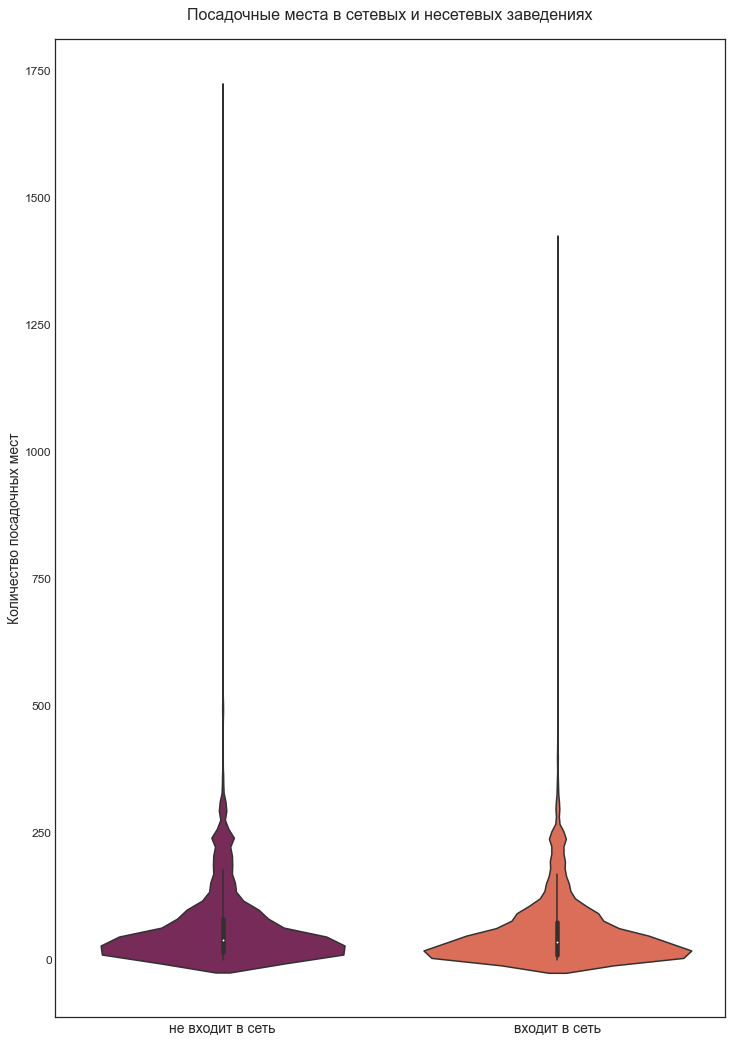

In [33]:
fig, ax = plt.subplots()
sns.violinplot(x='chain', y='number', palette=define_palette(2), data=rest_data)
plt.ylabel('Количество посадочных мест', fontsize=14)
plt.xlabel('')
plt.xticks([0, 1], ['не входит в сеть', 'входит в сеть'], fontsize=14)
plt.yticks(fontsize=12)
ax.set_title('Посадочные места в сетевых и несетевых заведениях', fontsize=16, pad=20)
fig.set_figheight(18)
fig.set_figwidth(12)
plt.show()

Так, на первый взгляд распределения посадочных мест у сетевых и несетевых заведений выглядит весьма похожим, однако медианное количество мест в сетевых заведениях всё же несколько ниже. Среди несетевых заведений наблюдается гораздо больше выбросов (видимо, объекты питания с очень большим количеством посадочных мест обычно единичные). Кроме того, большинство несетевых заведений имеют 40-50 посадочных мест, большинство несетевых - 20-35. И это логично, учитывая, что среди сетевых заведений много предприятий быстрого обслуживания, где вообще может не быть посадочных мест. Кроме того, большинство закусочных и отделов кулинарии магазинов, где мест обычно также немного, входят в сети.

Поподробнее изучим сетевые заведения столицы. Посмотрим, какой размер для них характерен. Посмотрим крайние значения мест для всего датафрейма и значения заведений в сети для сетей:

In [34]:
display(np.percentile(rest_data['number'], [10, 90]))
np.percentile(rest_data[rest_data['chain'] == 'да'].groupby('object_name').agg({'id':'count'})['id'], [10, 90])

array([  1., 150.])

array([2., 7.])

Получается, что 90% заведений имеют более 1-ого посадочных мест, а 10% заведений - более 150. Тогда будем считать, что менее 1-ого места - это мало, более 150-ти мест - это много. Поскольку в 75% сетевых заведений количество посадочных мест не превышает примерно 80, кажется, что для сетей характерно большое количество небольших заведений.

При этом лишь 10% сетей имеют больше 7 заведений. Будем считать крупными сетями те, количество объектов в которых превышает 7.

Проверим наличие корреляции между количеством заведений и количеством посадочных мест в сетях:

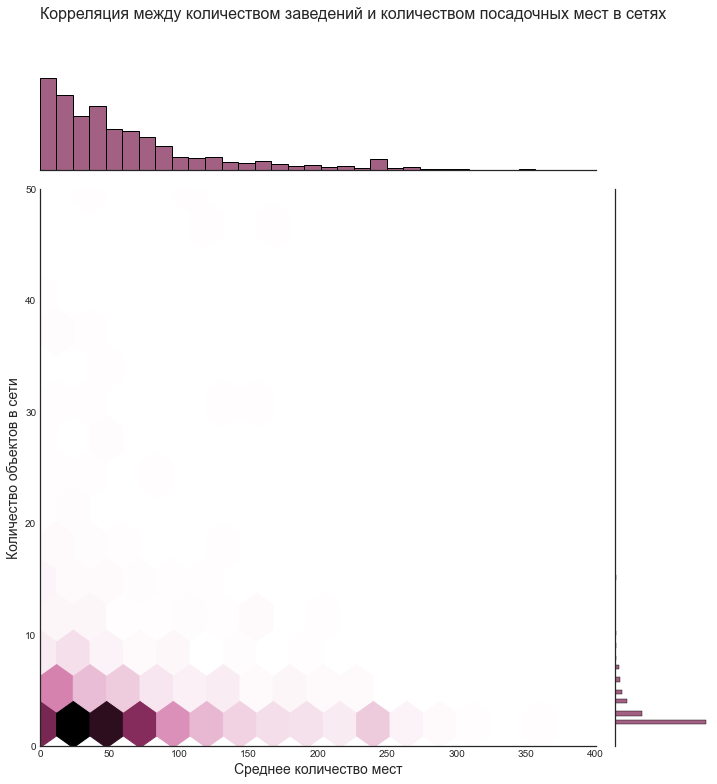

'Коэффициент корреляции между количеством заведений и количеством посадочных мест в сетях: -0.04027175640357937'

In [35]:
chained_rests = rest_data[rest_data['chain'] == 'да'].groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index()
g = sns.jointplot(kind='hex', x='number', y='id', xlim=(0, 400), ylim=(0, 50), height=10, color='#832b5a', data=chained_rests)
g.set_axis_labels('Среднее количество мест', 'Количество объектов в сети', fontsize=14)
plt.title('Корреляция между количеством заведений и количеством посадочных мест в сетях', fontsize=16, pad=170, loc='left')
plt.show()

display('Коэффициент корреляции между количеством заведений и количеством посадочных мест в сетях: {}'.format(chained_rests['id'].corr(chained_rests['number'])))

Так, получается, что зависимости между количеством заведений в сети и количеством посадочных мест нет. В большинство сетей входят небольшое число заведений с небольшим количеством посадочных мест.

Посмотрим на количество мест в сетевых заведениях в разреве по типам:

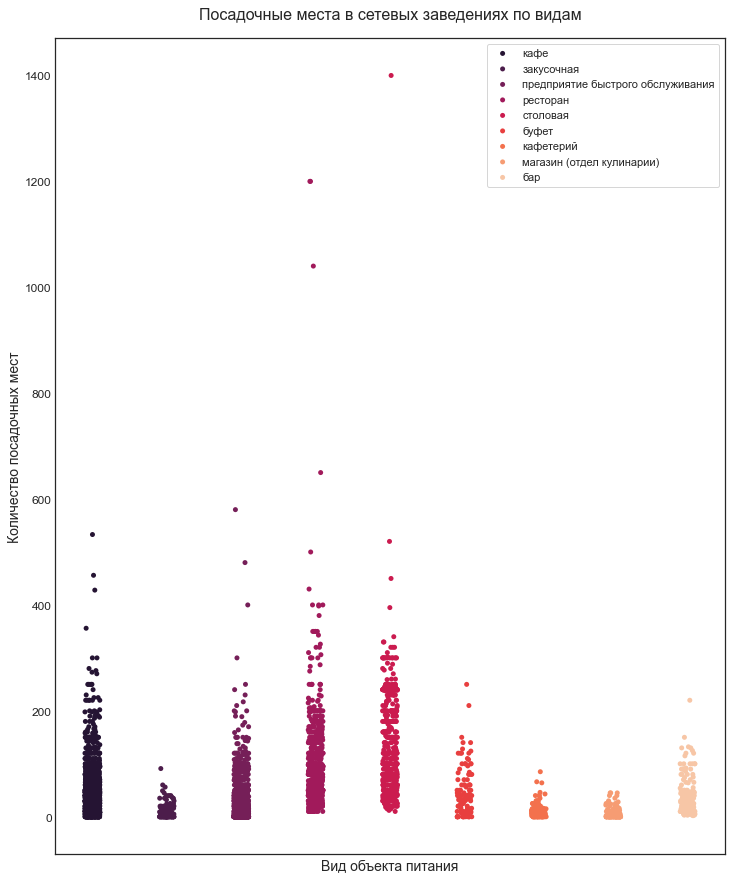

In [36]:
fig, ax = plt.subplots()
sns.stripplot(y='number', x='object_type', palette=define_palette(9), data=rest_data.query('chain == "да"'))
plt.xticks([])
plt.legend(list(rest_data.query('chain == "да"')['object_type'].unique()), fontsize=11, frameon=True)
plt.ylabel('Количество посадочных мест', fontsize=14)
plt.xlabel('Вид объекта питания', fontsize=14)
plt.yticks(fontsize=12)
ax.set_title('Посадочные места в сетевых заведениях по видам', fontsize=16, pad=20)
fig.set_figheight(15)
fig.set_figwidth(12)
plt.show()

Так, ожидаемо, самый большой разброс по количеству мест встречается среди ресторанов и столовых. Несколько меньше, но также достаточно значительный он у кафе и предприятий быстрого обслуживания. Совсем небольшой - у отделов кулинарии магазинов, кафетериев и закусочных, где количество посадочных мест стремится к нулю.

Теперь найдём среднее количество посадочных мест для каждого вида объекта питания вне зависимости от его принадлежности к сети: 

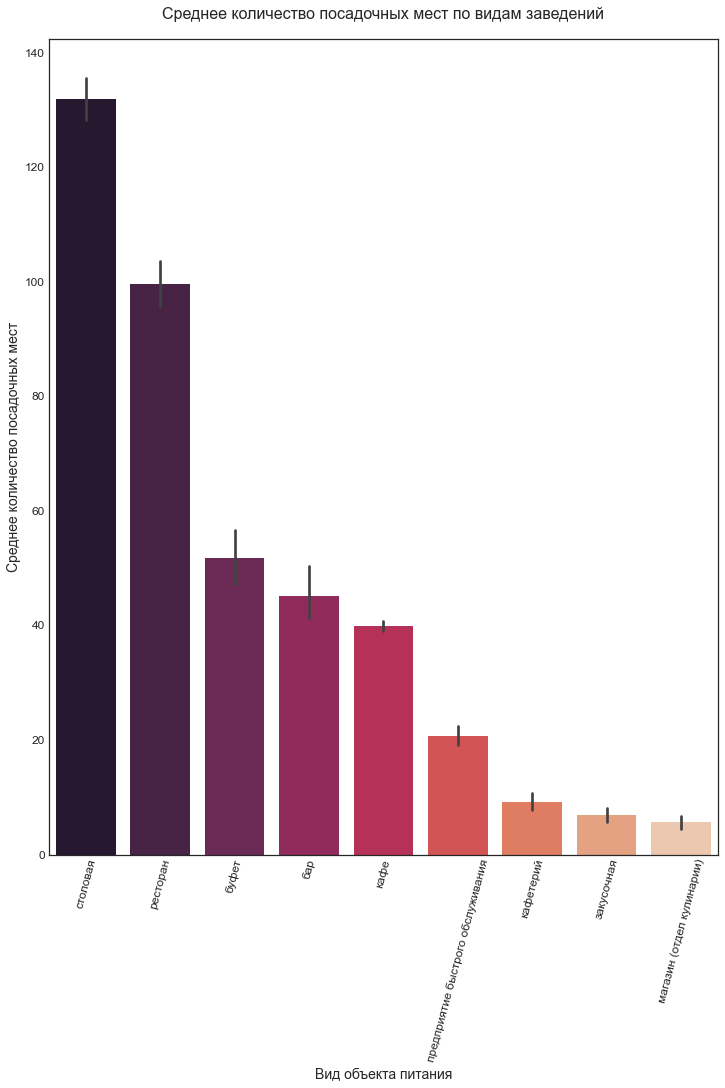

In [37]:
rests_sorted = rest_data.pivot_table(index='object_type', values='number').reset_index().sort_values(by='number', ascending=False)

fig, ax = plt.subplots()
sns.barplot(x='object_type', y='number', data=rest_data, palette=define_palette(9), order=rests_sorted['object_type'])
plt.xticks(rotation=75)
plt.ylabel('Среднее количество посадочных мест', fontsize=14)
plt.xlabel('Вид объекта питания', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Среднее количество посадочных мест по видам заведений', fontsize=16, pad=20)
fig.set_figheight(15)
fig.set_figwidth(12)
plt.show()

Так, самое большое среднее количество посадочных мест у столовых (более 130), далее следуют рестораны (приблизительно 100), затем буфеты (в районе 52), бары (около 45), кафе (примерно 42). В два раза меньше среднее число мест в предприятиях быстрого обслуживания (около 21). Немногим больше 10 мест - среднее для кафетериев, около 7 - для закусочных, в районе 5 - для кулинарных отделов в магазинах, поскольку в таких заведениях посетители обычно не остаются на долгое время. Кроме того, самое небольшое стандартное отклонение зафиксировано у кафе, а также у отделов кулинарии и закусочных.

Среднее количество мест в кафе говорит о том, что данные заведения обычно не рассчитаны на очень больше количество людей, а значит, для старта необычного проекта вполне можно открыть маленькое заведение (например, 10 столиков).

### Расположение

Теперь посмотрим, на каких улицах располагается наибольшее и наименьшее число объектов питания. Начнём с наиболее "популярных" среди рестораторов улиц:

In [38]:
# сгруппируем rest_data по улицам:
rest_data_by_street = rest_data.groupby('street').agg({'id':'nunique'}).reset_index().sort_values(by='id', ascending=False)
rest_data_by_street.columns = ['street', 'rest_number']

# объединим получившуюся таблицу с данными о районах:
rest_data_by_street = rest_data_by_street.merge(district_data_grouped, on='street', how='left')

rest_data_by_street.head()

,street,rest_number,district
0,проспект мира,195,мещанский район
1,ленинградский проспект,169,район аэропорт
2,профсоюзная улица,169,район черёмушки
3,пресненская набережная,163,пресненский район
4,варшавское шоссе,159,район чертаново южное


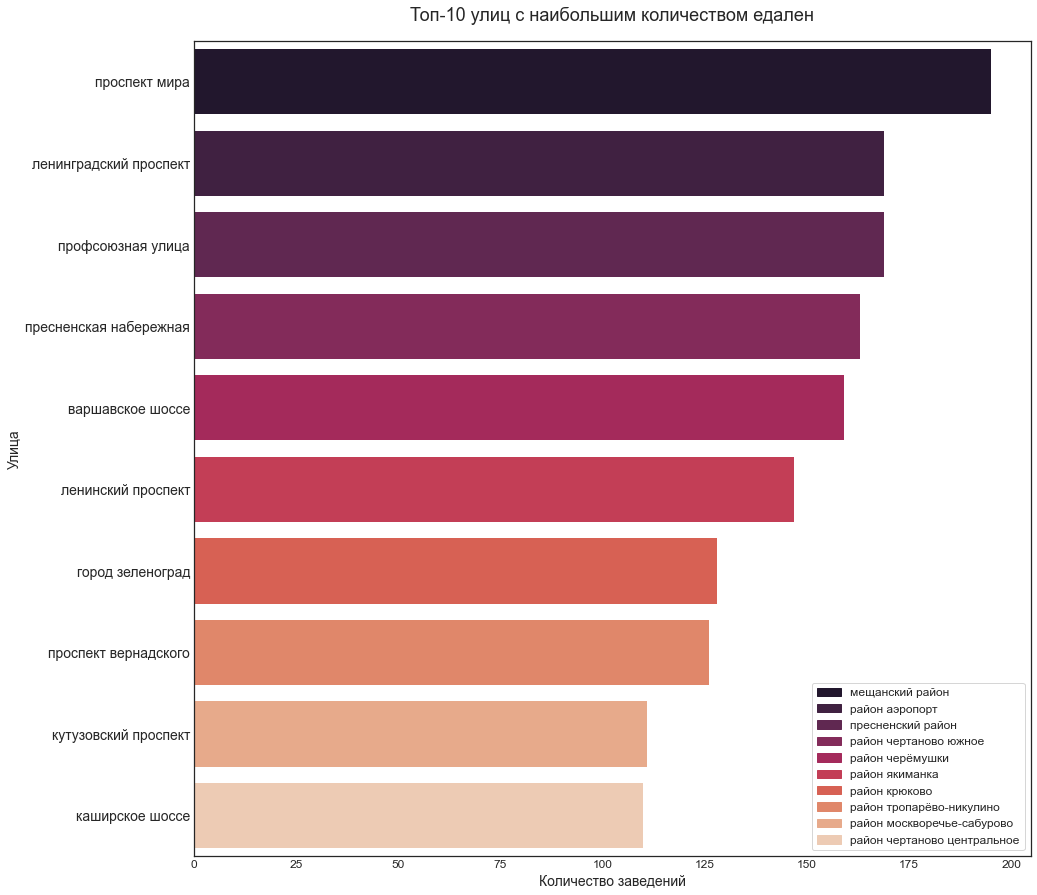

In [39]:
# выделим Топ-10 из rest_data_by_street:
top_streets = rest_data_by_street.head(10)

# построим столбчатую диаграмму:
fig, ax = plt.subplots()
sns.barplot(y='street', x='rest_number', data=top_streets, palette=define_palette(10))
plt.xlabel('Количество заведений', fontsize=14)
plt.ylabel('Улица', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
ax.set_title('Топ-10 улиц с наибольшим количеством едален', fontsize=18, pad=20)
fig.set_figheight(15)
fig.set_figwidth(15)
colors = {'мещанский район':'#22172d',
          'район аэропорт':'#402141',
          'пресненский район':'#602851',
          'район чертаново южное':'#832b5a',
          'район черёмушки':'#a42a5b',
          'район якиманка':'#c33e56', 'район крюково':'#d76154',
          'район тропарёво-никулино':'#e0876a',
          'район москворечье-сабурово':'#e7aa8b',
          'район чертаново центральное':'#edcbb4'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fontsize=12, frameon=True)
plt.show()

Как видно из диаграммы, на всех Топ-10 улицах количество заведений общественного питания превышает 100, а у лидирующей улицы (проспект Мира) даже приближается к 200. Очевидно, что все улицы из Топ-10 являются очень протяжёнными. Видимо, именно с этим связано такое большое количество заведений на них. Кроме того, стоит отметить, что улицы из Топ-10 располагаются совершенно в разных районах Москвы: среди них нет ни одного повторения и они находятся как в центре, так и на окраинах. Однако, поскольку данные улицы очень длинные, они располагаются в больше, чем одном районе. Чтобы найти все районы, через которые проходят данные улицы, воспользуемяс таблицей `district data`.

In [40]:
top_streets_list = list(top_streets['street'])

district_data[district_data['street'].isin(top_streets_list)][['street', 'district']].sort_values(by='street').drop_duplicates()

,street,district
1258,варшавское шоссе,донской район
227,варшавское шоссе,район чертаново южное
886,варшавское шоссе,нагорный район
866,варшавское шоссе,район чертаново северное
226,город зеленоград,район крюково
1502,город зеленоград,район савёлки
1696,город зеленоград,район матушкино
1167,каширское шоссе,район москворечье-сабурово
862,каширское шоссе,район нагатино-садовники
1847,каширское шоссе,район орехово-борисово северное


Так, большинство улиц из Топ-10 проходят хотя бы через три района. Интересно, что большинство этих районов не входят в Центральный округ Москвы.

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:

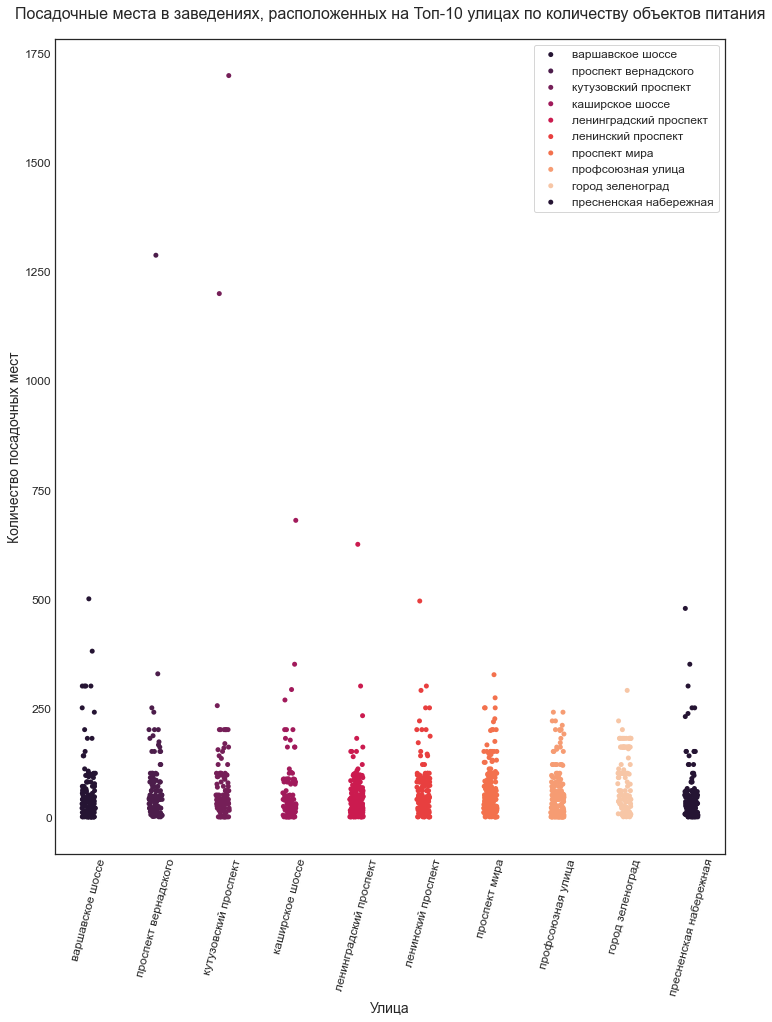

In [41]:
fig, ax = plt.subplots()
sns.stripplot(y='number', x='street', palette=define_palette(9), data=rest_data[rest_data['street'].isin(top_streets_list)])
plt.legend(list(rest_data[rest_data['street'].isin(top_streets_list)]['street'].unique()), fontsize=12, frameon=True)
plt.ylabel('Количество посадочных мест', fontsize=14)
plt.xlabel('Улица', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=75)
ax.set_title('Посадочные места в заведениях, расположенных на Топ-10 улицах по количеству объектов питания', fontsize=16, pad=20)
fig.set_figheight(15)
fig.set_figwidth(12)
plt.show()

Так, в большинстве заведений на всех улицах из Топ-10 количество посадочных мест не превышает 100 (то есть их относительно немного). Есть много объектов питания, где нет посадочных мест или их количество близко к нулю. Однако есть и выбросы. В целом можно сказать, что на улицах с самым большим количеством заведений, расположено много небольших объектов питания.

Теперь посмотрим на улице с наименьшим количеством объектов питания (т.е. с одним):

In [42]:
# выделим улицы с одним объектом общественного питания:
bottom_streets = rest_data_by_street.query('rest_number == 1')

display('Количество улиц с одним объектом питания: {}'.format(bottom_streets.shape[0]))
bottom_streets.head()

'Количество улиц с одним объектом питания: 628'

,street,rest_number,district
1403,1-й зачатьевский переулок,1,NaN
1404,1-й монетчиковский переулок,1,район замоскворечье
1405,1-й ботанический проезд,1,NaN
1406,черницынский проезд,1,NaN
1407,черниговский переулок,1,NaN


Таких улиц оказалось достаточно много: 628 штук! Кроме того, как видно уже из первых строк таблицы, не для всех из них определились районы. Однако посмотрим, какие районы удалось выявить:

In [43]:
# соберём все известные районы из таблтцы bottom_streets в список:
bottom_districts = list(bottom_streets['district'].dropna().unique())

display('Количество известных районов, где есть улицы с одним заведением: {}'.format(len(bottom_districts)))
bottom_districts

'Количество известных районов, где есть улицы с одним заведением: 39'

['район замоскворечье',
 'район северное медведково',
 'район раменки',
 'красносельский район',
 'район аэропорт',
 'район арбат',
 'район зюзино',
 'район капотня',
 'район ясенево',
 'район хамовники',
 'район лефортово',
 'басманный район',
 'савёловский район',
 'район северное бутово',
 'рязанский район',
 'район тёплый стан',
 'район хорошёво-мнёвники',
 'район дорогомилово',
 'донской район',
 'район якиманка',
 'тверской район',
 'поселение новофедоровское',
 'поселение московский',
 'поселение первомайское',
 'район косино-ухтомский',
 'южнопортовый район',
 'поселение марушкинское',
 'поселение десеновское',
 'поселение краснопахорское',
 'поселение вороновское',
 'район солнцево',
 'поселение троицк',
 'можайский район',
 'мещанский район',
 'тимирязевский район',
 'район сокольники',
 'район выхино-жулебино',
 'пресненский район',
 'таганский район']

Таких районов оказалось 39. Причём, как видно из списка, находятся они в совершенно разных частях города - как в центре (например, Якиманка, Арбат, Хамовники), так и на окраинах (например, Тёплый Стан и Солнцево).

Найдем районы, где больше всего улиц с 1 заведением:

In [44]:
bottom_streets.pivot_table(index='district', values='street', aggfunc='count').reset_index().sort_values(by='street', ascending=False).head()

,district,street
36,тверской район,5
29,район хамовники,4
2,красносельский район,3
18,район замоскворечье,3
14,район арбат,3


Так, все районы с наибольшим количесвом улиц с одним заведением находятся в центре. Это может быть связано с тем, что в центре располагается больше небольших прогулочных улочек.

Таким образом, количество заведений общественного питания на улице зависит скорее не от её географического местоположения, а от протяжённости и оживлённости улицы. Что касается кафе, где посетителей обслуживают роботы, то его лучше расположить на не очень оживленной улице (чтобы было меньше конкурентов) Центрального округа Москвы (Мещанский район, Пресненский район, район Якиманка, Тверской район и т. д.), поскольку там можно будет охватить больше разных групп посетителей.

## Выводы

Перед началом исследования была проведена предобработка данных, в ходе которой были выполнены следующие операции:
* Преобразованы записи в столбцах `object_name` и `address` для придания им единообразия.
* Удалены неявные дубликаты.
* Устранены артефакты в столбце `number` и ошибки в столбце `chain`.
* Добавлены столбцы с названием улиц `street` и названием районов `district`.

В ходе исследовательского анализа были выявлены следующие черты рынка объектов общественного питания в Москве:
1. ***По видам:*** более трети всех объектов питания в Москве (**около 6000**) позиционируют себя как **кафе** (видимо, именно кафе содержать проще всего). На втором месте по распространённости - **столовые (примерно 2500 объектов)**, далее идут **рестораны (около 2200)** и **предприятия быстрого обслуживания (чуть менее 2000)**. Все остальные виды заведений насчитывают менее 2400 точек. **Самыми малочисленными** являются **отделы кулинарии в магазинах (примерно 250 точек)**.
2. ***По принадлежности к сети:*** менее половины всех заведений общественного питания в Москве (**37.3%**) **входят в сеть**, при этом *сетевое распространение наиболее характерно для предприятий быстрого питания (60.1% из них являются частью сети), отделов кулинарии магазинов (56.6%) и закусочных (44.8%)*. Кроме того, зависимости между количеством заведений в сети и количеством посадочных мест выявить не удалось. *В большинство сетей входят небольшое число заведений с небольшим количеством посадочных мест.*
3. ***По количеству посадочных мест:*** *медианное количество посадочных мест в несетевых заведениях больше*, чем в сетевых, при этом *среди сетевых заведений самый большой разброс по количеству мест зафиксирован у ресторанов и столовых, совсем небольшой - у отделов кулинарии магазинов, кафетериев и закусочных*, где количество мест близко к нулю.
4. ***Среднее количество посадочных мест среди сетевых и несетевых заведений по видам:***
    1. столовые - 130;
    2. рестораны - 100;
    3. буфеты - 52;
    4. бары - 45;
    5. кафе - 42;
    6. предприятия быстрого обслуживания - 21;
    7. кафетерии - 10;
    8. закусочные - 7;
    9. кулинарные отделы в магазинах - 5.
5. ***По расположению:*** Все улицы из **Топ-10 по количеству едален** являются **очень длинными**, поэтому **почти каждая из них** расположена **более, чем в одном районе Москвы**, при **этом большинство из этих районов не входят в Центральный округ города**. **В большинстве заведений на всех улицах из Топ-10 достаточно немного посадочных мест** (не более 100). Кроме того, в столице обнаружено **628 улиц с одним объектом питания**, которые также расположены **в совершенно разных районах города**, однако **районы, где больше всего улиц с одним заведением, находятся в центре**, скорее всего, потому что там больше маленьких прогулочных улиц.

Исходя из полученной информации, можно дать следующие рекомендации для развития бизнес-идеи: лучше открывать **кафе с небольшим посадочных мест**, чтобы сэкономить на аренде помещения, так как проект и так дорогой (поскольку роботы, скорее всего, смогут **эффективнее обслуживать посетителей** из-за отсутсвия человеческого фактора, можно также **работать на вынос**) **в центральных районах Москвы** (например, Мещанский район, Пресненский район, район Якиманка, Тверской район), чтобы охватить более разнородную публику, но при этом **на улице с относительно небольшим количеством питейных заведений**, чтобы избежать высокой конкуренции.

## Представление результатов

Презентация: <https://disk.yandex.ru/i/2D4u0RtleAbCRA> 